Agglomerative Clustering from scratch

In [27]:
datapoints = [ (1,1),(2,2),(3,1),(12,4),(6,1),(9,1),(11,1),(13,9),(1,9),(1,10),
               (1,11),(12,10),(3,9),(3,10),(3,11),(13,10),(4,11),(6,6),(6,7),
                (14,11),(6,8),(7,6),(7,7),(8,7),(13,5),(14,5),(13,6),(10,8),(11,8) ]


# datapoints = [ (0.4,0.53),(0.22,0.38),(0.35,0.32),(0.26,0.19),(0.08,0.41),(0.45,0.3)]

datapoints = [ (1,1),(1.5,1.5),(5,5),(3,4),(4,4),(3,3.5)]

In [28]:
# point_names = [ chr(i)  for i in range(65,65+len(datapoints))]
point_names = [ 'p'+str(i+True)  for i in range(len(datapoints))]
linkages = [ 'single' , 'complete' , 'average' , 'centroid' ]

In [29]:
import math
def dist(x:list, y:list )->float:
    if type(x) == int:
        return round( math.sqrt( (x-y)**2 ) ,2)
    sum=0
    for i in range(len(x)):
        sum += (x[i] - y[i])**2 

    return round(math.sqrt(sum),2)

In [30]:
def dist_mat_(points):
    n=len(points)
    dist_mat=[ [None]*n for _ in points ]

    for i in range(n):
        for j in range(n):
            dist_mat[i][j] = dist(points[i],points[j])

    return dist_mat

In [31]:
def return_min_idx(mat):
    n=len(mat)
    min_dist = float('inf')
    idx=(0,0)
    for i in range(n):
        for j in range(n):
            if (i!=j) and (mat[i][j] < min_dist) :
                min_dist=mat[i][j]
                idx=(i,j)
    return idx

In [32]:
def linkage_(a,b,linkage='single'):
    
    if 'single' == linkage.lower():
        return min(a,b )  
    if 'complete' == linkage.lower():
        return max(a,b )  
    if 'average' == linkage.lower():
        return sum(a,b)//2
    return min(a,b)

In [33]:
def merge(dm,pn,linkage='single'):
    z=[]
    di=5.0

    zz ={}
    for i,p in enumerate(pn):
        zz[p]=[i,1]

    du_pn = []
    nn = len(pn)
    while len(dm) >1:
        up_dm =[]
        
        idx1,idx2 = return_min_idx(dm)

        for in_li in dm:
            li = in_li[0:idx1] + [linkage_(in_li[idx1],in_li[idx2],linkage=linkage)] + in_li[idx1+1:idx2] + in_li[idx2+1:]
            up_dm.append( li )

        for i in range(len(up_dm[0])):
            up_dm[idx1][i] = linkage_(up_dm[idx1][i],up_dm[idx2][i])
        del up_dm[idx2]

        up_pn = []
        for i in range(len(pn)):
            if i == idx1:
                h = tuple( [ pn[i] , pn[idx2]] )
                up_pn.append(h)
                du_pn.append(pn[i])
            elif i == idx2:
                du_pn.append(pn[i])
            else:
                up_pn.append(pn[i])
            yo = tuple( [pn[idx1],pn[idx2]] )        

        l = zz[yo[0]][1] + zz[yo[1]][1]

        zz[ yo ] = [nn,l]
        nn+=1

        z.append( [ zz[ yo[0] ] [0] , zz[ yo[1] ] [0] , di  ,  l  ]  )
        di+=5.0

        dm = up_dm
        pn = up_pn

    # print(zz)
    return up_pn,z


In [34]:
def agglomerative(points,labels,linkage):
    return merge(dist_mat_(points),labels,linkage)[1]

In [35]:
y = agglomerative(datapoints,point_names,linkage='single')

<function matplotlib.pyplot.show(close=None, block=None)>

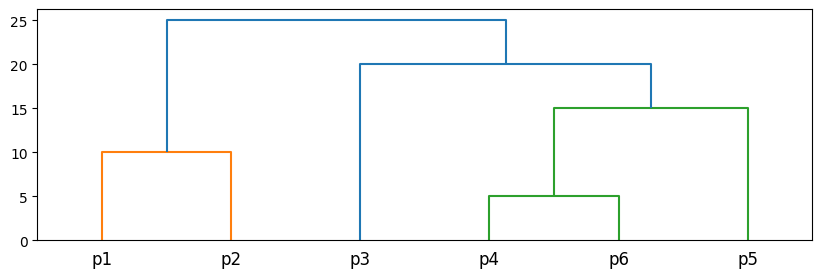

In [36]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

[ [   ['p1', 'p2'] , ['p3', [  ['p4', 'p6'] , 'p5']  ]  ]  ]
#        0     1       2          3     5       4
#                                    6
#           7
#                                8
#          
#                       10                                 


plt.figure(figsize=(10,3))
dendrogram(y,labels=point_names)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

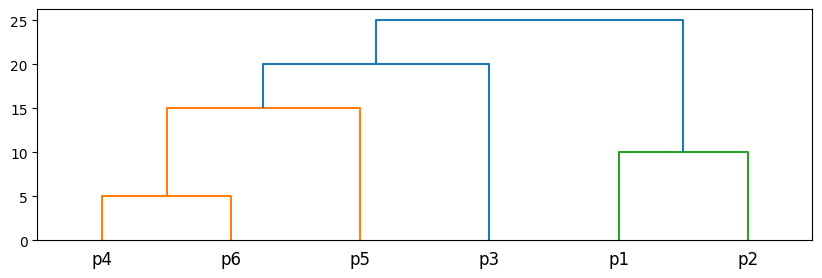

In [37]:
y = agglomerative(datapoints,point_names,linkage='complete')
plt.figure(figsize=(10,3))
dendrogram(y,labels=point_names)
plt.show

In [39]:
y = agglomerative(datapoints,point_names,linkage='average')
plt.figure(figsize=(10,3))
dendrogram(y,labels=point_names)
plt.show

TypeError: 'float' object is not iterable

Agglomerative By using linkage() Method

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage

datapoints = np.array( [ (1,1),(2,2),(3,1),(12,4),(6,1),(9,1),(11,1),(13,9),(1,9),(1,10),
               (1,11),(12,10),(3,9),(3,10),(3,11),(13,10),(4,11),(6,6),(6,7),
                (14,11),(6,8),(7,6),(7,7),(8,7),(13,5),(14,5),(13,6),(10,8),(11,8) ] )

labels = [ chr(i) for i in range(65,65+len(datapoints)) ]

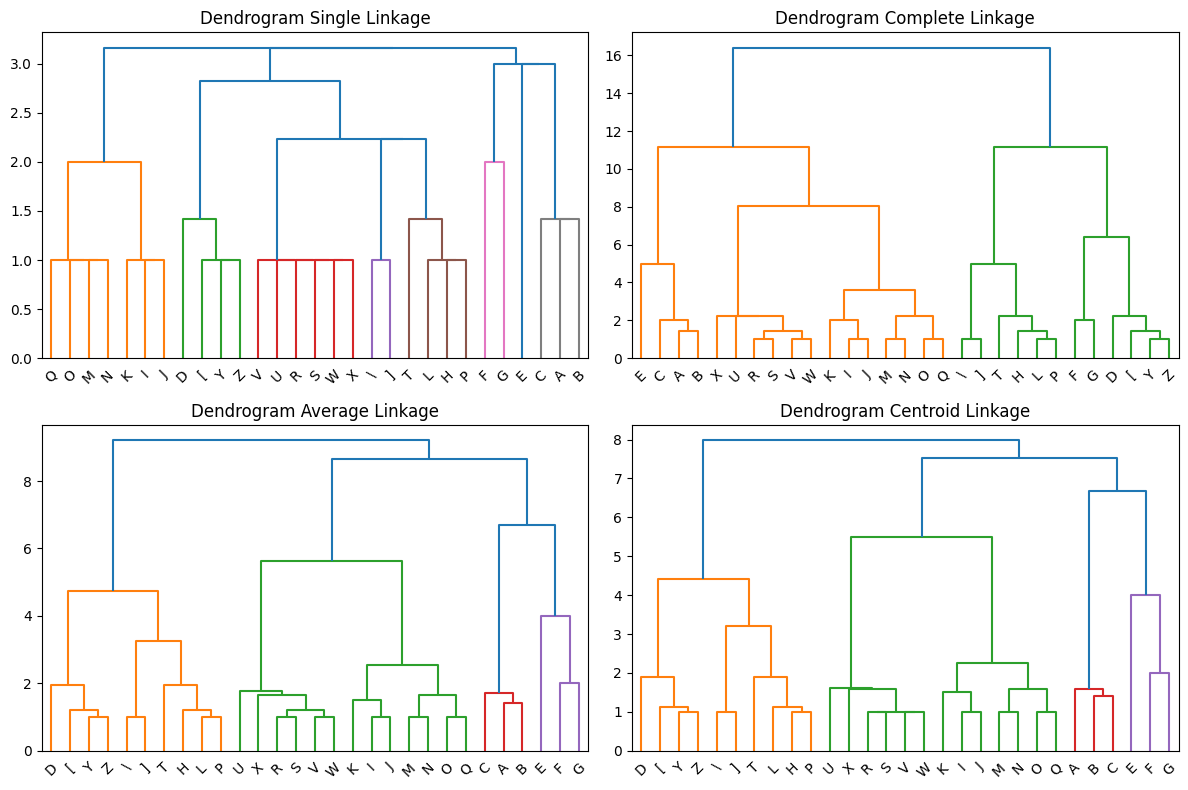

In [44]:
methods = ['single','complete','average','centroid']

plt.figure(figsize=(12,8))
for i,method in enumerate(methods):
    plt.subplot(2,2,i+1)

    Z = linkage(datapoints,method=method)
    

    dendrogram(Z,labels=labels)
    plt.title(f'dendrogram {method} linkage'.title())
plt.tight_layout()
plt.show()

Agglomerative for Iris Data 

In [45]:
from sklearn.datasets import load_iris

X =load_iris().data

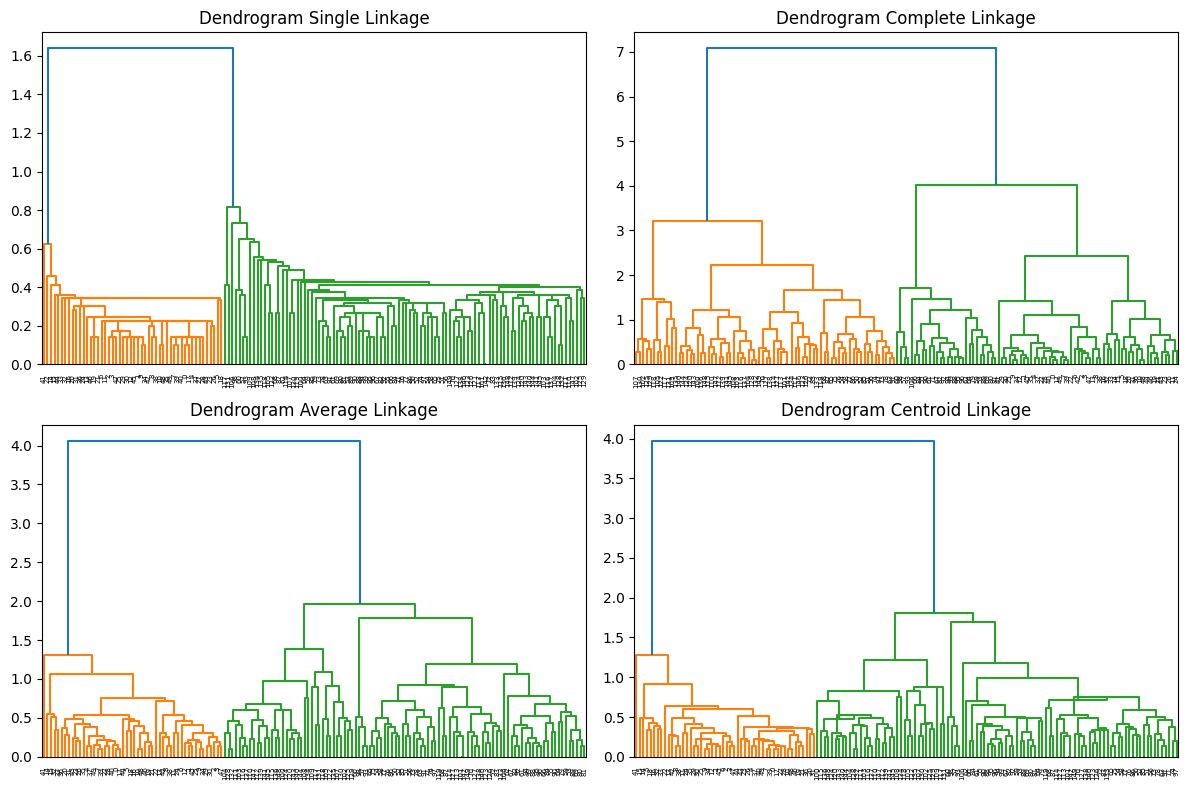

In [46]:
methods = ['single','complete','average','centroid']

plt.figure(figsize=(12,8))
for i,method in enumerate(methods):
    plt.subplot(2,2,i+1)

    Z = linkage(X,method=method)

    # Z = agglomerative(X,labels=[str(1)]*len(X),linkage=method)

    dendrogram(Z)
    plt.title(f'dendrogram {method} linkage'.title())
plt.tight_layout()
plt.show()

In [49]:
from scipy.cluster.hierarchy import fcluster

Z = linkage(X,method='average')

clusters = fcluster(Z,t=3.0,criterion='distance')

len(np.unique(clusters))
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)